In [1]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np
import pandas as pd
import json
from bson import json_util, ObjectId
import re
import ast
import seaborn as sns
import matplotlib.dates as mdates
import itertools
import networkx as nx
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import math
import powerlaw

In [2]:
TG = nx.read_graphml("TG.graphml")
nx.info(TG)

'Name: \nType: DiGraph\nNumber of nodes: 13838\nNumber of edges: 381998\nAverage in degree:  27.6050\nAverage out degree:  27.6050'

In [3]:
df=pd.read_csv("DATA_CRAN/VERSIONS_BY_PACKAGE.csv", header=0, sep="|")

In [4]:
df

,Package,NumberOfVersions
0,Matrix,198
1,spatstat,196
2,mgcv,154
3,lattice,133
4,nlme,131
...,...,...
15364,pBrackets,1
15365,p2distance,1
15366,ozmaps,1
15367,SurrogateOutcome,1


In [5]:
degree_centrality = nx.degree_centrality(TG)
DC = {k: v for k, v in sorted(degree_centrality.items(), 
                              key=lambda item: item[1], reverse = True)}

In [6]:
df2 = pd.DataFrame(DC.items(), columns=['Package','Centrality' ])

In [7]:
result = pd.merge(df, df2, how='inner',left_on='Package', right_on='Package')

In [8]:
result

,Package,NumberOfVersions,Centrality
0,Matrix,198,0.407241
1,spatstat,196,0.009323
2,mgcv,154,0.251066
3,lattice,133,0.486594
4,nlme,131,0.294428
...,...,...,...
13687,pCalibrate,1,0.001373
13688,pBrackets,1,0.000145
13689,ozmaps,1,0.001518
13690,SurrogateOutcome,1,0.000723


In [18]:
result.describe()

,NumberOfVersions,Centrality
count,13692.000000,13692.000000
mean,6.319822,0.003644
std,9.617688,0.018099
min,1.000000,0.000072
25%,2.000000,0.000506
50%,3.000000,0.001229
75%,7.000000,0.003686
max,198.000000,0.530100


In [39]:
result_aux = result[(result['NumberOfVersions']>10) & (result['Centrality']>0.005)]

In [40]:
result_aux.shape

(543, 3)

In [41]:
result_aux['NumberOfVersions'].values

array([198, 196, 154, 133, 131, 131, 128, 128, 127, 120, 118, 116, 114,
       109, 107, 104,  98,  94,  94,  93,  90,  86,  86,  85,  85,  84,
        82,  80,  79,  78,  77,  76,  75,  73,  69,  66,  65,  64,  64,
        63,  62,  61,  60,  59,  57,  55,  55,  54,  54,  53,  52,  52,
        51,  51,  50,  50,  50,  50,  49,  49,  49,  48,  48,  48,  47,
        46,  46,  46,  46,  46,  46,  45,  45,  44,  44,  43,  43,  43,
        43,  42,  42,  42,  41,  41,  41,  41,  40,  40,  40,  40,  40,
        39,  39,  39,  39,  38,  38,  37,  37,  37,  37,  37,  36,  36,
        36,  36,  36,  36,  36,  36,  36,  36,  35,  35,  35,  35,  35,
        35,  34,  34,  34,  34,  34,  34,  34,  33,  33,  33,  33,  33,
        33,  33,  32,  32,  32,  32,  32,  32,  32,  32,  31,  31,  31,
        31,  31,  31,  30,  30,  30,  30,  30,  30,  29,  29,  29,  29,
        29,  29,  29,  29,  28,  28,  28,  28,  28,  28,  28,  28,  28,
        28,  28,  27,  27,  27,  27,  27,  27,  26,  26,  26,  2

In [42]:
from scipy.stats import linregress
x = result_aux['Centrality'].values
y = result_aux['NumberOfVersions'].values
linregress(x,y)

LinregressResult(slope=104.7115251501773, intercept=24.777190484505685, rvalue=0.2694799275809456, pvalue=1.7307161033236131e-10, stderr=16.087865497010597)

23.961029021185755
0.07270037732149359


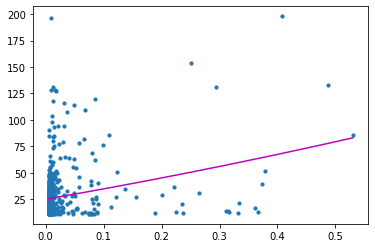

In [43]:
poly_regression(x,y)

In [12]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

def poly_regression(x,y):
    # transforming the data to include another axis
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]

    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print(rmse)
    print(r2)

    plt.scatter(x, y, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.show()

0.9792990961295482
0.03987653565774285


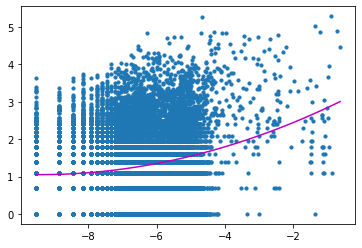